In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

2016-08-23


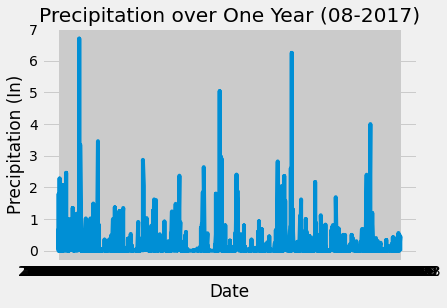

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

# Perform a query to retrieve the data and precipitation scores
date_prcp=session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).filter(measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.DataFrame(date_prcp, columns=['date', 'prcp'])
date_prcp_df=date_prcp_df.dropna()
date_prcp_df=date_prcp_df.set_index('date')

# Sort the dataframe by date
date_prcp_df=date_prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(date_prcp_df)
plt.ylabel('Precipitation (In)')
plt.xlabel('Date')
plt.title('Precipitation over One Year (08-2017)')
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations_df = pd.read_sql("SELECT station, COUNT(station) FROM measurement GROUP BY station ORDER BY COUNT(station) DESC", conn)
active_stations_df

,station,COUNT(station)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station=active_stations_df.loc[0,'station']
station_temps=session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station==most_active_station).all()
station_temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

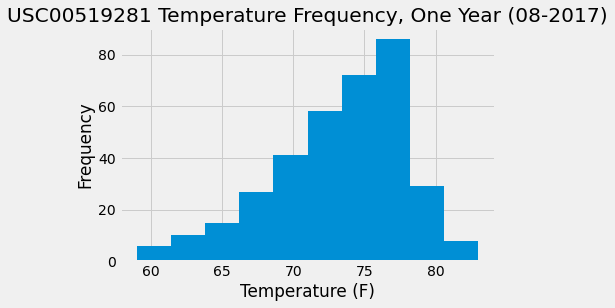

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date_tobs=session.query(measurement.date, measurement.tobs).order_by(measurement.date.desc()).filter(measurement.date >= last_year).filter(measurement.station==most_active_station)
date_tobs_df=pd.DataFrame(date_tobs)
date_tobs_df=date_tobs_df.dropna()
date_tobs_df=date_tobs_df.set_index('date')

# Sort the dataframe by date
date_tobs_df=date_tobs_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(date_tobs_df)
plt.ylabel('Frequency')
plt.xlabel('Temperature (F)')
plt.title('USC00519281 Temperature Frequency, One Year (08-2017)')
plt.show()

# Close session

In [16]:
# Close Session
session.close()